<a href="https://colab.research.google.com/github/khodozzz/neural-networks-tasks/blob/main/4_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

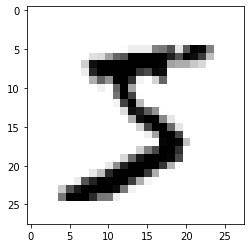

5


In [10]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.show()

print(train_labels[0])

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Модель

In [13]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Dropout, MaxPool2D
from tensorflow.keras.models import Sequential

In [14]:
def build_model(opt):
    model = Sequential([
        Flatten(),
        Dense(1024,activation='relu'),
        Dropout(0.2),
        Dense(10,activation='softmax')
    ])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Исследовать влияние различных оптимизаторов, а также их параметров, на процесс обучения

In [16]:
opts = ['adadelta', 'adagrad', 'adam', 'adamax', 'ftrl', 'nadam', 'rmsprop', 'sgd']

for opt in opts:
    print(opt)
    model = build_model(opt)
    %time model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=4, batch_size=128)
    print()

adadelta
Epoch 1/4
469/469 [==============================] - 8s 17ms/step - loss: 2.2441 - accuracy: 0.1706 - val_loss: 2.1370 - val_accuracy: 0.2741
Epoch 2/4
469/469 [==============================] - 8s 16ms/step - loss: 2.0579 - accuracy: 0.3566 - val_loss: 1.9550 - val_accuracy: 0.4983
Epoch 3/4
469/469 [==============================] - 8s 16ms/step - loss: 1.8882 - accuracy: 0.5197 - val_loss: 1.7906 - val_accuracy: 0.6324
Epoch 4/4
469/469 [==============================] - 8s 16ms/step - loss: 1.7356 - accuracy: 0.6266 - val_loss: 1.6419 - val_accuracy: 0.7109
CPU times: user 50.7 s, sys: 1.8 s, total: 52.5 s
Wall time: 41.5 s

adagrad
Epoch 1/4
469/469 [==============================] - 8s 15ms/step - loss: 1.7060 - accuracy: 0.5837 - val_loss: 1.2067 - val_accuracy: 0.8057
Epoch 2/4
469/469 [==============================] - 7s 15ms/step - loss: 1.0168 - accuracy: 0.8041 - val_loss: 0.8077 - val_accuracy: 0.8480
Epoch 3/4
469/469 [==============================] - 7s 15ms/s

Написать функцию, которая позволит загружать пользовательское изображение не из датасета

In [17]:
model = build_model('adam')
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2482 - accuracy: 0.9280 - val_loss: 0.1150 - val_accuracy: 0.9648
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1009 - accuracy: 0.9705 - val_loss: 0.0905 - val_accuracy: 0.9721
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0684 - accuracy: 0.9788 - val_loss: 0.0744 - val_accuracy: 0.9766
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0708 - val_accuracy: 0.9774
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0389 - accuracy: 0.9883 - val_loss: 0.0646 - val_accuracy: 0.9801
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0648 - val_accuracy: 0.9789
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0248 - accuracy: 0.9925 - val_loss: 0.0628 - val_accuracy: 0.9810

In [18]:
from tensorflow.keras.preprocessing import image
from skimage.color import rgb2gray
import numpy as np

def upload_digit(file_name):
    img = image.load_img(file_name, target_size=(28, 28))

    dig = image.img_to_array(img)
    dig = 1 - (rgb2gray(dig) / 255)

    plt.imshow(dig, cmap=plt.cm.binary)
    plt.show()

    dig = np.expand_dims(dig, axis=0)
    dig = np.vstack([dig])  

    return dig


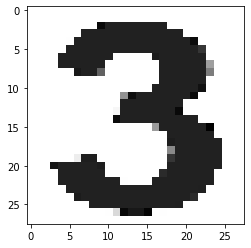

3

In [23]:
dig3 = upload_digit('3.png')

classes = model.predict(dig3)
np.argmax(classes)